# Day 18 Pre-Class Assignment:  Markov Chain Monte Carlo (MCMC)
### <p style="text-align: right;"> &#9989; Cesarine Graham.</p>

---
## Goals of this assignment

The goals of this assignment are:

* Learn about importance sampling and statistical mechanics
* Introduction to Markov-chain Monte-Carlo (MCMC) methods
* Basis of Metropolis algorithm

## Assignment instructions

Upload the assignment to Gradescope before 5PM the day of the next class.

---
# Part 0: Monte-Carlo Recap

Monte Carlo is the name given to any procedure using random sampling to approximate the correct answer rather than using a deterministic procedure.
Computer simulations may use Monte-Carlo methods to simulate a random physical process in order to estimate something about the outcome of that process.
We have seen examples like this in the previous in-class problems involving radioactive isotopes.
Although Monte Carlo simulation finds uses in every branch of physics, there is one area where it used more than any other: statistical mechanics.
Because statistical mechanics is fundamentally about random (or apparently random) processes, Monte-Carlo simulation assumes a particular importance in the field.
Below, we will look at Monte Carlo simulation, focusing particularly on statistical mechanics.


----
# Part 1: Importance Sampling and Statistical Mechanics

Recall that the fundamental problem of statistical mechanics is to calculate the expectation value of a quantity of interest for a physical system in thermal equilibrium at temperature $T$.
We don't know the exact state of the physical system.
Instead, all we know is that a system at temperature $T$ will pass through a succession of states such that at any particular moment the probability of its occupying state $i$ with energy $E_i$ is given by the Boltzmann formula

$$P_i = \frac{е^{-\beta E_i}}{Z} \quad\text{with}\quad Z = \sum_i e^{-\beta E_i},$$

where $\beta= (k_B T)^{-1}$ and $k_B$ is the Boltzmann constant.

The average value of a quantity $X$ that takes the value $X_i$ in the $i$th state is

$$ \langle X\rangle = \sum_k X_k P_k. $$

Unfortunately, the number of possible states is infinite or at least astronomically large.
Thus, we approximate the expectation value by taking a sample of $N$ states:

$$ \langle X\rangle \approx \frac{\sum_{k=1}^N X_k P_k }{\sum_{k=1}^N P_k} $$

Unfortunately, this approximation is likely to be very bad, since most states have vanishingly small $P_k$.
We can use importance sampling to select states that have high probability of occurring (that is, $P_k$ is large).
This can be accomplished simply by setting the weight function of the importance sampling equal to the probabilities $P_k$.

This would yield a good approximation, but how can we produce random importance sampling with the correct distribution?
Arranging the terms correctly would require that we know $Z$, which is an infinite sum we don't know how to do.

---
# Part 2: Markov Chain Monte Carlo (MCMC)

A Markov chain is a random sampling where each sample is not selected independently, but rather each sample depends on the sample selected before it.
Indeed, you can think of each sample as being a modification of the previous sample.
By suitably arranging the modification process, we can encourage the sampling to probe regions of high importance.
For carefully selected conditions, we can prove (though we won't work through the details here) that a Markov-chain Monte-Carlo (MCMC) sampling can reproduce the importance sampling needed to get the correct answer to the expectation-value problem posed above.

Suppose we start out in some state $i$, and we consider the probability that the next step will be to state $j$; this transition will happen with probability $T_{ij}$.
If we are in a situation where our MCMC is working correctly, we want these transition probabilities to match the probability distribution of our original problem:

$$ \frac{T_{ij}}{T_{ji}} = \frac{P_j}{P_i} $$

Since we know $P_i = e^{-\beta E_i}/Z$, this means

$$ \frac{T_{ij}}{T_{ji}} = e^{-\beta(E_j-E_i)}, $$

where we note that the difficult $Z$ factor has canceled.

Suppose that we've found a way to put our system into state $i$ with probability $P_i$.
Then, using our transition, the probability we go to state $j$ is the probability we're currently in each state times the transition probability:

$$ \sum_i T_{ij} P_i = \sum T_{ji} P_j = P_j \sum_i T_{ji} = P_j, $$

where we used the equation above and also the fact that the transition probability is normal $\sum_i T_{ji} = 1$.
This means that if we had our system in the right probability distribution to begin with, then our transitions would shuffle states around such that it would remain in the right distribution.
In fact, one can show (though we won't here) that regardless of what distribution you start out in, by applying the transitions over and over, the distribution will move toward its stable state, which is the distribution with the probabilities we want.

Watch the following YouTube Video to learn some _high-level_ information about how MCMC works in the context of distributions.
If you don't follow all the terminology in this video, it's OK.
To prove how MCMC works takes many pages of analysis, but using it is actually not so complicated.

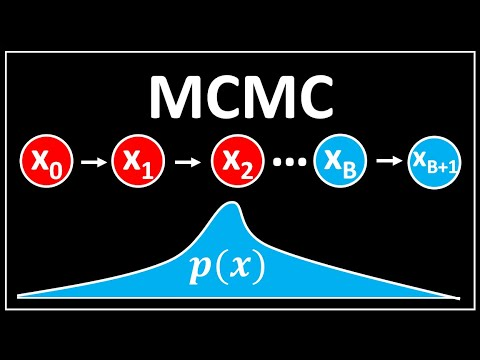

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("yApmR-c_hKU",width=640,height=340)
# Direct link on YourTube: https://www.youtube.com/watch?v=yApmR-c_hKU


---
## Part 3: Metropolis Algorithm

Now, it just remains to come up with a scheme that has the right transition probabilities.
In fact, there are lots of ways to do this, but the most popular is the _Metropolis algorithm_, which goes like this:

1. Select a set of allowed "moves" for your system (e.g. one random particle moves to one random new state; or one random spin flips)
1. Choose any starting state.
1. Choose a move from the move-set with uniform probability distribution.
1. If the new state has lower energy ($E_j \le E_i$), apply the move.
1. If the new state has higher energy, accept the move with probability $e^{-\beta(E_j-E_i)}$. (If you rejected the move, the new state is the same as the old state.)
1. Repeat from step 3 until you've collected sufficient samples.

There are a few extra caveats:
- Don't forget to count samples where nothing changed; they must be counted in the average!
- Your move-set must allow the system to visit **all** available states. This property is called _ergodicity_.
- The number of moves must be the same for all states. Even if a move makes no sense for a state (e.g. you try to move a particle through an impenetrable barrier), you must still try it and accept with zero probability.
- It will take some time for your distribution to approach the correct one. This is called _equilibration_ or _thermalization_. You can tell when your system is equilibrated by examining quantities of interest; these will tend to drift while not equilibrated, then jitter noisily at the same value once you've reached equilibrium.

---
## Assignment Wrap-up

Please fill out the [pre-class survey Google Form](https://forms.gle/cfz3AdbVw9aqZDuL7) and submit your notebook in ipynb format to Gradescope.